In [1]:
!pip install gym[all]


!pip install stable_baselines3[extra] #installing the required packages in the notebook

!pip install numpy

!pip install pandas

!pip install random

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Using cached lz4-4.0.0-cp39-cp39-win_amd64.whl (96 kB)
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  Running setup.py clean for box2d-py
  Running setup.py clean for mujoco-py
Failed to build box2d-py mujoco-py
    Running setup.py install for mujoco-py: started
    Running setup.py install for mujoco-py: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\saina\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\saina\\AppData\\Local\\Temp\\pip-install-7cjsdg87\\box2d-py_3bc9f189bf854166913cf7899f0c1476\\setup.py'"'"'; __file__='"'"'C:\\Users\\saina\\AppData\\Local\\Temp\\pip-install-7cjsdg87\\box2d-py_3bc9f189bf854166913cf7899f0c1476\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\saina\AppData\Local\Temp\pip-wheel-m5afpd8x'
       cwd: C:\Users\saina\AppData\Local\Temp\pip-install-7cjsdg87\box2d-py_3bc9f189bf854166913cf7899f0c1476\
  Complete output (16 lines):
  Using setuptools (version 58.0.4).
  running bdist_wheel
  running build
  running build_py
  creating build


ERROR: Invalid requirement: '#installing'


^C


ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [3]:
import gym

from gym import Env

from gym.spaces import Discrete, Box

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import datetime as dt
import seaborn as sns
%matplotlib notebook
import tensorflow as tf
%load_ext tensorboard

import random
import os
#%pylab inline
from stable_baselines3 import PPO #Proximal Policy Optimization algorithm (MLP)
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


OSError: [WinError 182] The operating system cannot run %1. Error loading "C:\Users\saina\anaconda3\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [4]:
#creating the custom environment 
#the environment is for detection of carbon emission violation and sounding an alarm if it is not within the required range

class regulateEnv(Env):
    def __init__(self):
        
        self.action_space=Discrete(2) #it can either ring the alarm or not
        
        self.observation_space=Box(low=np.array([400]),high=np.array([800]))
        
        self.state =450 + random.randint(-100,100) #this is optimal CO2 range
        
        self.alarm_length =60 # how long to ring
        
    def step(self,action):
        #take decision whether to continue the alarm or the co2 has been adjusted
        self.state += action-1
        #decrease the alarm time
        self.alarm_length -=1 
        
        
        
        
        
        #the reward scheme: if the emission is not within the range sound an alarm...if within recommended range , give reward
        if self.state >=450 and self.state <=600:
            reward=10
        else:
            reward=-5
        if self.alarm_length <=0:
            done=True
        else:
            done=False
            
        details={}
            
            
        return self.state,reward ,done, details
    
    def render(self):
        # we are not going to do rendering since it is text based
        pass
  

    def reset(self):
        self.state=np.array([450+random.randint(-100,100)]).astype(float)
        self.alarm_length=60
        return self.state
    
       
    
    

In [70]:
env=regulateEnv()#make the environment

C:\Users\saina\anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [5]:
'''def animate(xs, ys,rewards):
    
    fig = plt.figure()
    
    ax = fig.add_subplot(1, 1, 1)
    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(rewards)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    #plt.title('episodes over time')
    #plt.ylabel('Score over episodes')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)
plt.show()'''

"def animate(xs, ys,rewards):\n    \n    fig = plt.figure()\n    \n    ax = fig.add_subplot(1, 1, 1)\n    # Add x and y to lists\n    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))\n    ys.append(rewards)\n\n    # Limit x and y lists to 20 items\n    xs = xs[-20:]\n    ys = ys[-20:]\n\n    # Draw x and y lists\n    ax.clear()\n    ax.plot(xs, ys)\n\n    # Format plot\n    plt.xticks(rotation=45, ha='right')\n    plt.subplots_adjust(bottom=0.30)\n    #plt.title('episodes over time')\n    #plt.ylabel('Score over episodes')\n\n# Set up plot to call animate() function periodically\nani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)\nplt.show()"

<IPython.core.display.Javascript object>


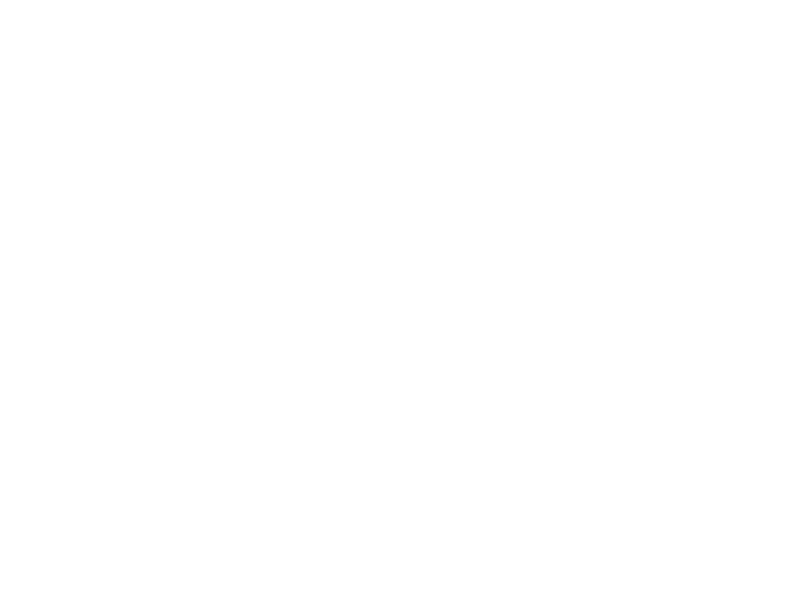

NameError: name 'env' is not defined

In [6]:
episodes=100
rewards=[]
ep=[]
fig = plt.figure()
total_rewards=0

for episode in range(1, episodes+1):
    obs=env.reset()
    done=False
    score=0
    

    
    while not done:
        env.render()
        action= env.action_space.sample()
        obs, reward,done,_=env.step(action)
        score +=reward
        total_rewards += score
        
        
    print('Episode: {} Score{}'.format(episode,score))
    rewards.append(score)
    ep.append(episode)
    #print(rewards)
    #print(episode)
    
print('The total rewards are {}'.format(total_rewards)) #if positive it means the machine is learning
d = {'Episode':ep,'rewards':rewards}
df = pd.DataFrame(d)
print(df)
def animate(i):
    data = df.iloc[:int(i+1)] 
    graph = sns.relplot(y=data['Episode'], x=data['rewards'],data=data ,color="blue")
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(data.index),interval=700,repeat=True)
animate(100)
env.close()

In [102]:
#we are going to train the model using neural networks
net_arch=[dict(pi=[128,128,128,128],vf=[128,128,128,128])]#we are specifying that we are going to have a neural network of 4 layerss
#each of values , 128,128,128,128 and the same for our value function


In [103]:
#the code is to be saved to this path
saved_path=os.path.join('Reinforcement Learning','Model') # for saving the best updated model

In [105]:
stop_callback=StopTrainingOnRewardThreshold(reward_threshold=600,verbose=1)

eval_callback=EvalCallback(env, #passing in the created environment,Reward threshold
        callback_on_new_best=stop_callback,
        eval_freq=10000, #it will check whether it has reached the best model after every 10000 steps
        best_model_save_path=saved_path, #it will save the model here
        verbose=1)

In [106]:
#path='Reinforcement Learning\Logs'
log_path=os.path.join('Reinforcement Learning','Logs\logs.txt')
log_path


'Reinforcement Learning\\Logs\\logs.txt'

In [107]:

model=A2C('MlpPolicy',env,verbose=1,tensorboard_log=log_path,policy_kwargs={'net_arch':net_arch})

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [108]:
temp=model.learn(total_timesteps=5000,callback=eval_callback)
temp
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Logging to Reinforcement Learning\Logs\logs.txt\A2C_8
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 60       |
|    ep_rew_mean        | 262      |
| time/                 |          |
|    fps                | 327      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.0123  |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0486   |
|    value_loss         | 1.03e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 60       |
|    ep_rew_mean        | 262      |
| time/                 |          |
|    fps                | 347      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps 

In [110]:
'''logdir=os.path.join('Reinforcement Learning\Logs\logs.txt\A2C_3')
%tensorboard --logdir logs.txt'''

"logdir=os.path.join('Reinforcement Learning\\Logs\\logs.txt\\A2C_3')\n%tensorboard --logdir logs.txt"

In [111]:
best_warning_model=os.path.join('Reinforcement Learning','Model','New Warning Model')

In [112]:
model.save(best_warning_model)

In [113]:
# model=PPO.load(best_warning_model,env)
model=A2C.load(best_warning_model,env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [116]:
#to evaluate our model ,we are going to run it
evaluate_policy(model,env,n_eval_episodes=100)
#if the model is not working perfectly , we can train it for longer

C:\Users\saina\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(240.0, 440.90815370097204)